In [2]:
install.packages(c("corrplot","psych","FactoMineR","factoextra","reshape2","RColorBrewer"))

Installing packages into 'C:/Users/jusec/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked
package 'FactoMineR' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'FactoMineR'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\jusec\AppData\Local\R\win-library\4.4\00LOCK\FactoMineR\libs\x64\FactoMineR.dll  a C:\Users\jusec\AppData\Local\R\win-library\4.4\FactoMineR\libs\x64\FactoMineR.dll: Permission denied"
Warning message:
"restored 'FactoMineR'"


package 'factoextra' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reshape2'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\jusec\AppData\Local\R\win-library\4.4\00LOCK\reshape2\libs\x64\reshape2.dll  a C:\Users\jusec\AppData\Local\R\win-library\4.4\reshape2\libs\x64\reshape2.dll: Permission denied"
Warning message:
"restored 'reshape2'"


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jusec\AppData\Local\Temp\Rtmp29BEWj\downloaded_packages


In [3]:
require("corrplot")
require("psych")
require("FactoMineR")
require("factoextra")
require("reshape2")
require("RColorBrewer")
require("tidyverse")

Cargando paquete requerido: corrplot

corrplot 0.94 loaded

Cargando paquete requerido: psych

Cargando paquete requerido: FactoMineR

Cargando paquete requerido: factoextra

Cargando paquete requerido: ggplot2


Adjuntando el paquete: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Cargando paquete requerido: reshape2

Cargando paquete requerido: RColorBrewer

Cargando paquete requerido: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats:

In [47]:
df <- read.csv("dfFinal.csv")
str(df)

'data.frame':	41 obs. of  22 variables:
 $ city                          : chr  "Tokyo" "Jakarta" "Delhi" "Guangzhou" ...
 $ lat                           : num  35.69 -6.17 28.61 23.13 19.08 ...
 $ lng                           : num  139.7 106.8 77.2 113.3 72.9 ...
 $ country                       : chr  "Japan" "Indonesia" "India" "China" ...
 $ population                    : num  37732000 33756000 32226000 26940000 24973000 ...
 $ Crime.Index                   : num  24.1 52.7 59.4 30.4 44.8 64.7 29.4 24.5 62.7 27 ...
 $ Safety.Index                  : num  75.9 47.3 40.6 69.6 55.2 35.3 70.6 75.5 37.3 73 ...
 $ pressure                      : num  1012 1009 1003 1003 1008 ...
 $ temp                          : num  302 302 305 303 301 ...
 $ sea_level                     : num  1012 1009 1003 1003 1008 ...
 $ humidity                      : num  66.6 54.5 47.2 69.7 69.7 ...
 $ CCost.of.Living.Index         : num  57.4 32 24.4 35.1 25.2 37.6 42.1 70.3 27.9 37.1 ...
 $ Rent.Index   

In [55]:
# Eliminar la columna 'city' antes de calcular la correlación
df_num <- df[ , !(names(df) %in% c('city', 'dominant_Pollutant', 'country'))]

# Verifica las columnas restantes
str(df_num)

# Asegurarte de que todas las columnas restantes sean numéricas para la correlación
df_num <- df_num[sapply(df_num, is.numeric)]

'data.frame':	41 obs. of  20 variables:
 $ lat                           : num  35.69 -6.17 28.61 23.13 19.08 ...
 $ lng                           : num  139.7 106.8 77.2 113.3 72.9 ...
 $ population                    : num  37732000 33756000 32226000 26940000 24973000 ...
 $ Crime.Index                   : num  24.1 52.7 59.4 30.4 44.8 64.7 29.4 24.5 62.7 27 ...
 $ Safety.Index                  : num  75.9 47.3 40.6 69.6 55.2 35.3 70.6 75.5 37.3 73 ...
 $ pressure                      : num  1012 1009 1003 1003 1008 ...
 $ temp                          : num  302 302 305 303 301 ...
 $ sea_level                     : num  1012 1009 1003 1003 1008 ...
 $ humidity                      : num  66.6 54.5 47.2 69.7 69.7 ...
 $ CCost.of.Living.Index         : num  57.4 32 24.4 35.1 25.2 37.6 42.1 70.3 27.9 37.1 ...
 $ Rent.Index                    : num  29.3 12.8 7.3 13.3 19 15.9 30.7 29.1 3.8 26.4 ...
 $ Cost.of.Living.Plus.Rent.Index: num  44.1 22.9 16.3 24.8 22.2 27.3 36.7 50.8 16.5 32 

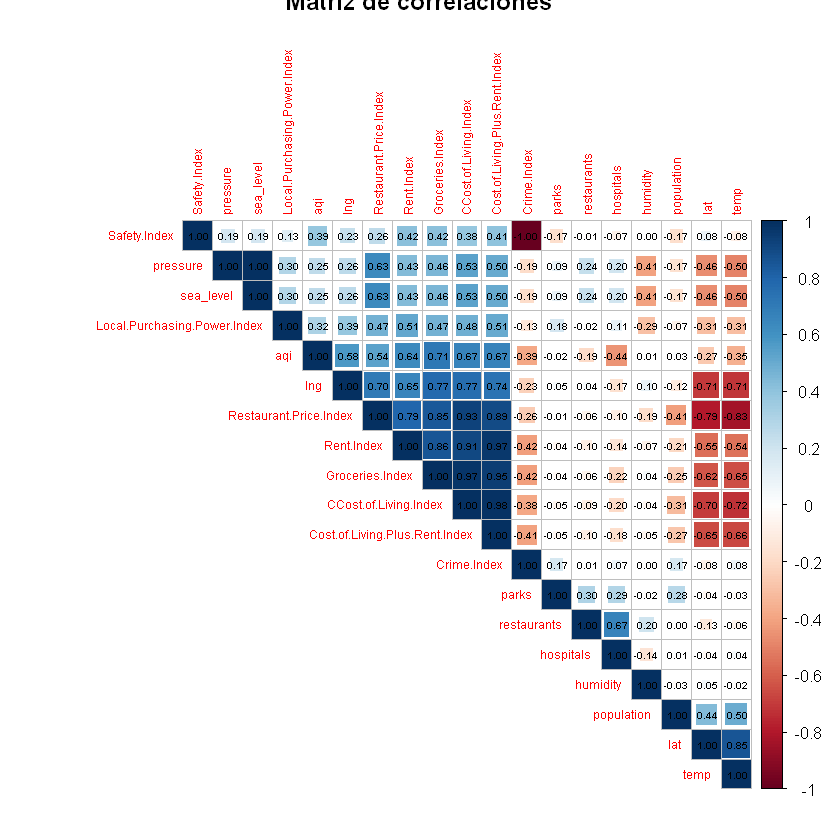

In [56]:
corrplot(cor(df_num),type = 'upper',method="square",title="Matriz de correlaciones", tl.cex=0.6,order="hclust", addCoef.col = "black", number.cex=0.5)

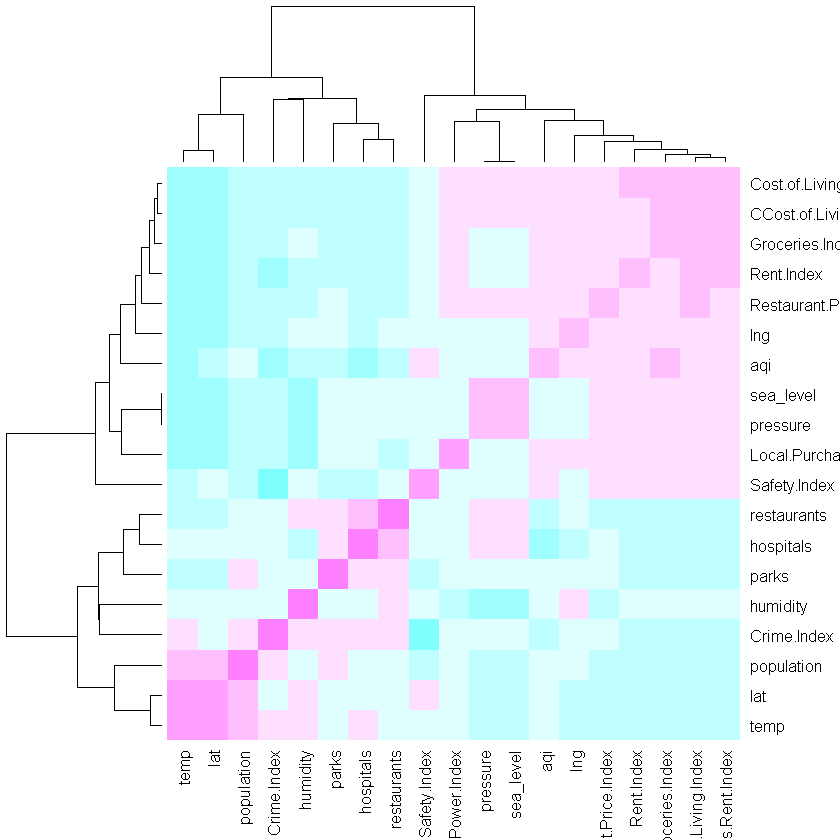

In [57]:
heatmap(cor(df_num), col=cm.colors(8))

In [58]:
pcaCiudades <- princomp(df_num,cor = T)
summary(pcaCiudades)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.8690030 1.6148456 1.3937720 1.23317183 1.20540589
Proportion of Variance 0.4332199 0.1372488 0.1022421 0.08003751 0.07647386
Cumulative Proportion  0.4332199 0.5704687 0.6727108 0.75274831 0.82922217
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.94289371 0.77900585 0.69242948 0.63334719 0.56401610
Proportion of Variance 0.04679203 0.03193948 0.02523466 0.02111203 0.01674285
Cumulative Proportion  0.87601420 0.90795368 0.93318834 0.95430037 0.97104322
                          Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     0.43613095 0.354372718 0.310959286 0.300896100
Proportion of Variance 0.01001106 0.006609475 0.005089246 0.004765182
Cumulative Proportion  0.98105429 0.987663761 0.992753007 0.997518190
                           Comp.15      Comp.16      Comp.17      Comp.18
Standard

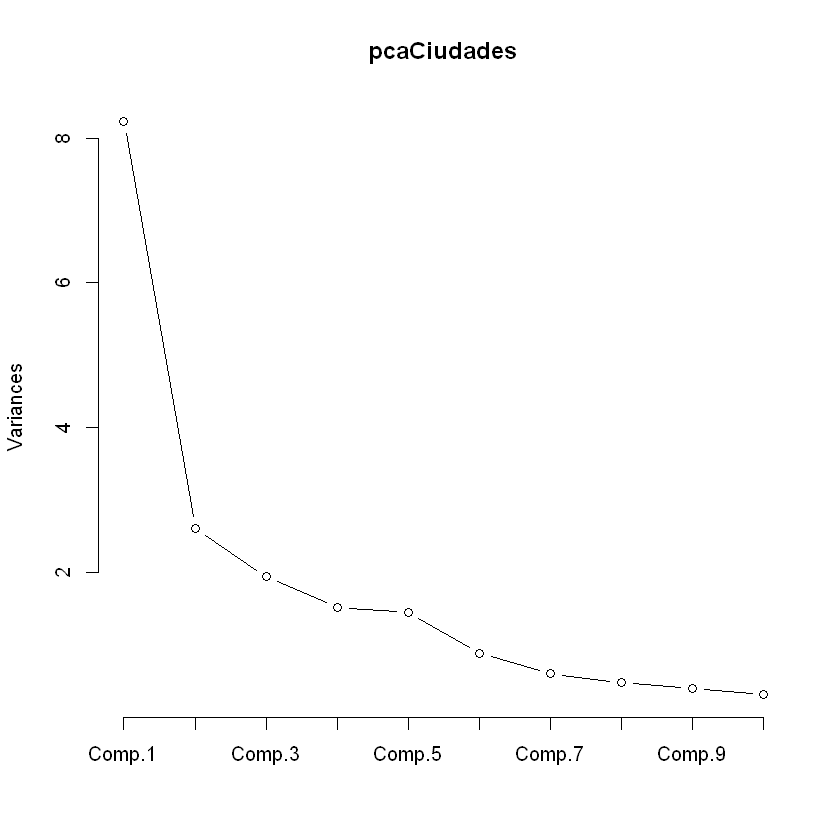

In [52]:
screeplot(pcaCiudades, type = 'lines')

In [53]:
round(pcaCiudades$loadings[,1:5],4)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
lat,0.2581,0.2193,0.3066,0.1006,0.1284
lng,-0.2735,0.0413,-0.1917,-0.1789,0.1880
population,0.1235,0.0275,0.0888,0.1851,0.6130
Crime.Index,0.1450,-0.2933,-0.5080,0.1842,0.0819
Safety.Index,-0.1450,0.2933,0.5080,-0.1842,-0.0819
pressure,-0.2185,-0.3176,0.2393,0.2109,-0.1201
temp,0.2736,0.1487,0.2355,0.1310,0.1740
sea_level,-0.2185,-0.3176,0.2393,0.2109,-0.1201
humidity,0.0425,0.1837,-0.2200,-0.6163,0.0894
CCost.of.Living.Index,-0.3401,0.0568,-0.0487,-0.0113,0.0356


Using medicion as id variables



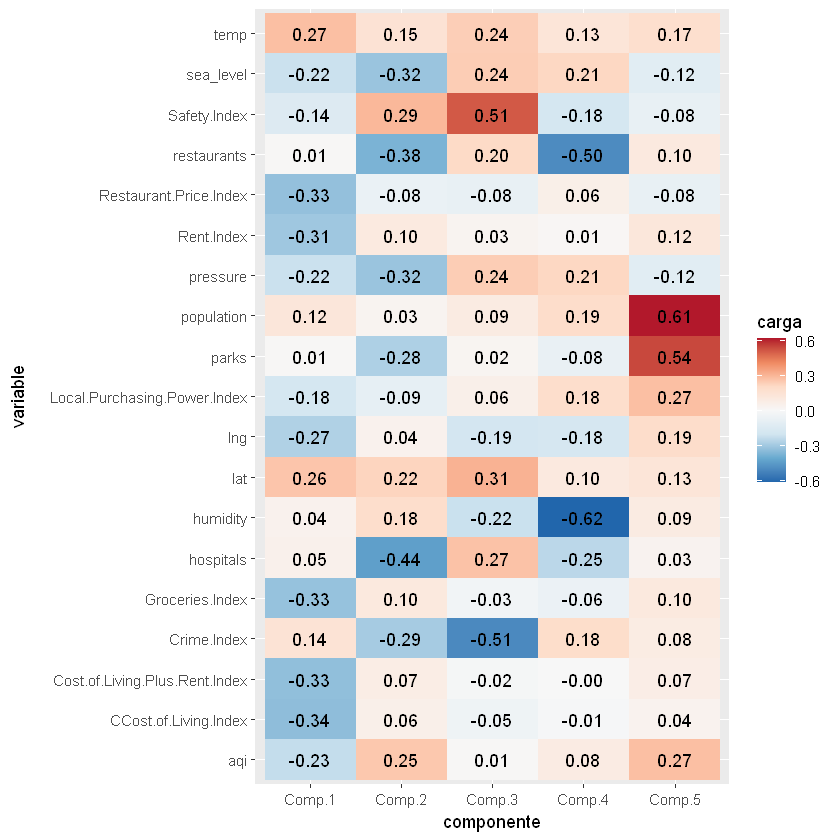

In [59]:
cargasdfr<-as.data.frame(pcaCiudades$loadings[,1:5])
cargasdfr$medicion<-rownames(cargasdfr)
cargasheatr<-reshape2::melt(cargasdfr)
colnames(cargasheatr)<-c("variable","componente","carga")
ggplot(cargasheatr,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

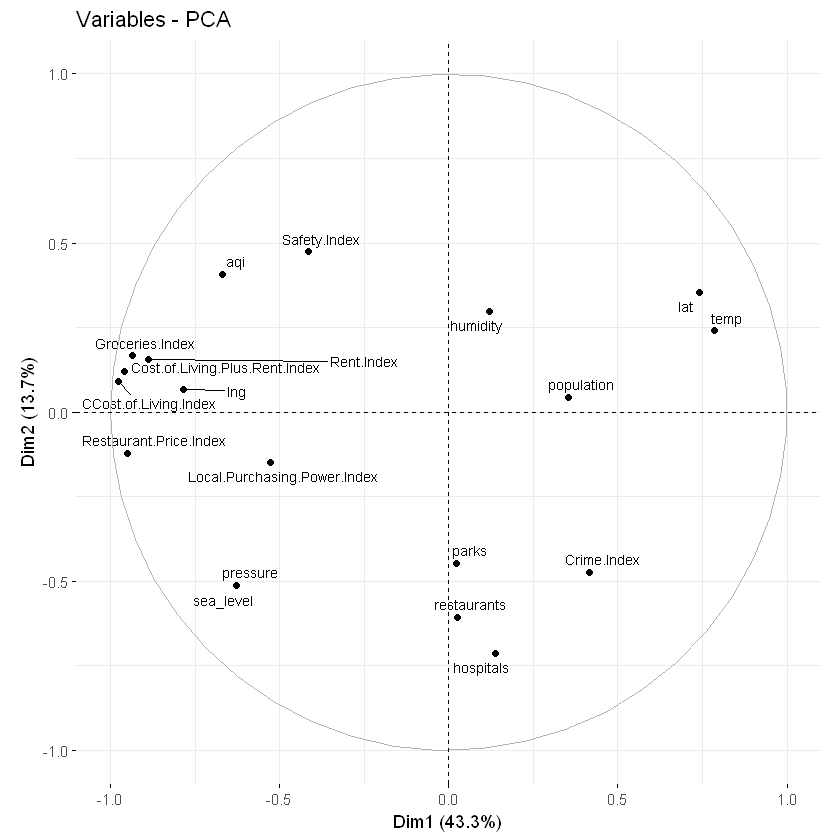

In [60]:
fviz_pca_var(pcaCiudades, geom = c("point","text"), repel=TRUE, labelsize=3)

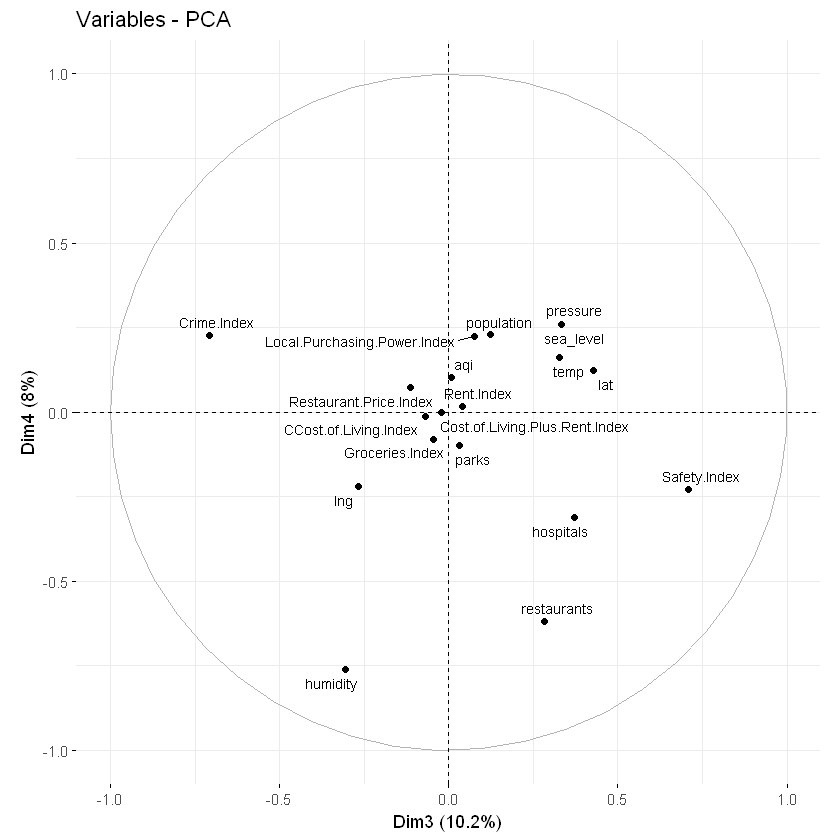

In [61]:
fviz_pca_var(pcaCiudades,axes=c(3,4), geom =c("point","text"),repel=TRUE, labelsize=3)